<a href="https://colab.research.google.com/github/Nguthirukar/Nguthirukar/blob/main/Feedforward_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [8]:
class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = []
        self.biases = []

        # Initialize weights and biases
        for i in range(self.num_layers - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]))
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        self.layer_inputs = []
        self.layer_outputs = [X]

        for i in range(self.num_layers - 1):
            layer_input = np.dot(self.layer_outputs[-1], self.weights[i]) + self.biases[i]
            self.layer_inputs.append(layer_input)
            layer_output = self.sigmoid(layer_input)
            self.layer_outputs.append(layer_output)

        return self.layer_outputs[-1]

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.layer_outputs[-1]
        deltas = [output_error * self.sigmoid_derivative(self.layer_outputs[-1])]

        # Backpropagate the error
        for i in range(self.num_layers - 2, 0, -1):
            delta = deltas[-1].dot(self.weights[i].T) * self.sigmoid_derivative(self.layer_outputs[i])
            deltas.append(delta)

        deltas.reverse()

        # Update weights and biases
        for i in range(self.num_layers - 1):
            self.weights[i] += self.layer_outputs[i].T.dot(deltas[i]) * learning_rate
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * learning_rate

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            self.forward_propagation(X)
            self.backpropagation(X, y, learning_rate)
            if (epoch + 1) % 1000 == 0:
                loss = np.mean(np.square(y - self.layer_outputs[-1]))
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')


In [10]:
# Sample data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# the structure of the neural network
layer_sizes = [2, 3, 3, 1]

# Hyperparameters
learning_rate = 0.1
epochs = 10000

# Initialize and train the neural network
nn = NeuralNetwork(layer_sizes)
nn.train(X, y, learning_rate, epochs)

# Test the neural network
output = nn.forward_propagation(X)
print("Predicted Output:")
print(output)


Epoch 1000/10000, Loss: 0.24630910329129102
Epoch 2000/10000, Loss: 0.2300032384936312
Epoch 3000/10000, Loss: 0.18268875445998245
Epoch 4000/10000, Loss: 0.14129403019845213
Epoch 5000/10000, Loss: 0.03323041657247043
Epoch 6000/10000, Loss: 0.011099747215827554
Epoch 7000/10000, Loss: 0.005884085287867554
Epoch 8000/10000, Loss: 0.003843213995170757
Epoch 9000/10000, Loss: 0.0028006460603645107
Epoch 10000/10000, Loss: 0.0021804163392827643
Predicted Output:
[[0.04114972]
 [0.95168607]
 [0.95358304]
 [0.05037488]]


In [11]:
# Test the neural network
output = nn.forward_propagation(X)
print("Predicted Output:")
print(output)


Predicted Output:
[[0.04114972]
 [0.95168607]
 [0.95358304]
 [0.05037488]]


In [12]:
from graphviz import Digraph

In [13]:
def visualize_neural_network(nn):
    dot = Digraph()
    dot.attr(rankdir='LR', size='10')

    # Adding input layer
    with dot.subgraph(name='cluster_input') as c:
        c.attr(color='white')
        for i in range(nn.layer_sizes[0]):
            c.node(f'Input_{i}', shape='circle', style='filled', color='lightblue', label=f'Input {i+1}')
        c.attr(label='Input Layer')

    # Adding hidden layers
    for l in range(1, nn.num_layers - 1):
        with dot.subgraph(name=f'cluster_hidden_{l}') as c:
            c.attr(color='white')
            for i in range(nn.layer_sizes[l]):
                c.node(f'Hidden_{l}_{i}', shape='circle', style='filled', color='lightgreen', label=f'Hidden {l}.{i+1}')
            c.attr(label=f'Hidden Layer {l}')

    # Adding output layer
    with dot.subgraph(name='cluster_output') as c:
        c.attr(color='white')
        for i in range(nn.layer_sizes[-1]):
            c.node(f'Output_{i}', shape='circle', style='filled', color='lightcoral', label=f'Output {i+1}')
        c.attr(label='Output Layer')

    # Adding edges for input to first hidden layer
    for i in range(nn.layer_sizes[0]):
        for j in range(nn.layer_sizes[1]):
            dot.edge(f'Input_{i}', f'Hidden_1_{j}')

    # Adding edges for hidden layers
    for l in range(1, nn.num_layers - 2):
        for i in range(nn.layer_sizes[l]):
            for j in range(nn.layer_sizes[l + 1]):
                dot.edge(f'Hidden_{l}_{i}', f'Hidden_{l + 1}_{j}')

    for i in range(nn.layer_sizes[-2]):
        for j in range(nn.layer_sizes[-1]):
            dot.edge(f'Hidden_{nn.num_layers - 2}_{i}', f'Output_{j}')

    return dot


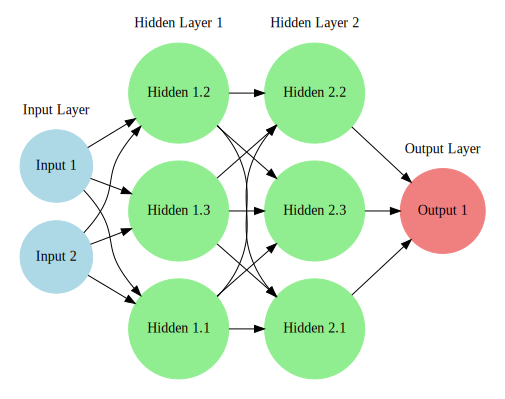

In [15]:
dot = visualize_neural_network(nn)
dot.render('neural_network', format='png', cleanup=True)
dot